<a href="https://colab.research.google.com/github/Jnanasagara/machine-learning-lab/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A1. Entropy of the 'Stuttering' dataset: 0.90273564471154
A2. Gini Index of the 'Stuttering' dataset: 0.4341107674186375
——————————————————————————————————————————————————
A4,A3. Information Gain for feature '0_binned': 0.0008936076391946601
A4,A3. Information Gain for feature '1_binned': 0.002443784637594093
——————————————————————————————————————————————————
A5. Decision Tree Classifier Accuracy: 0.6832448092708836
A5. Confusion Matrix:
[[   0 1968]
 [   0 4245]]
——————————————————————————————————————————————————


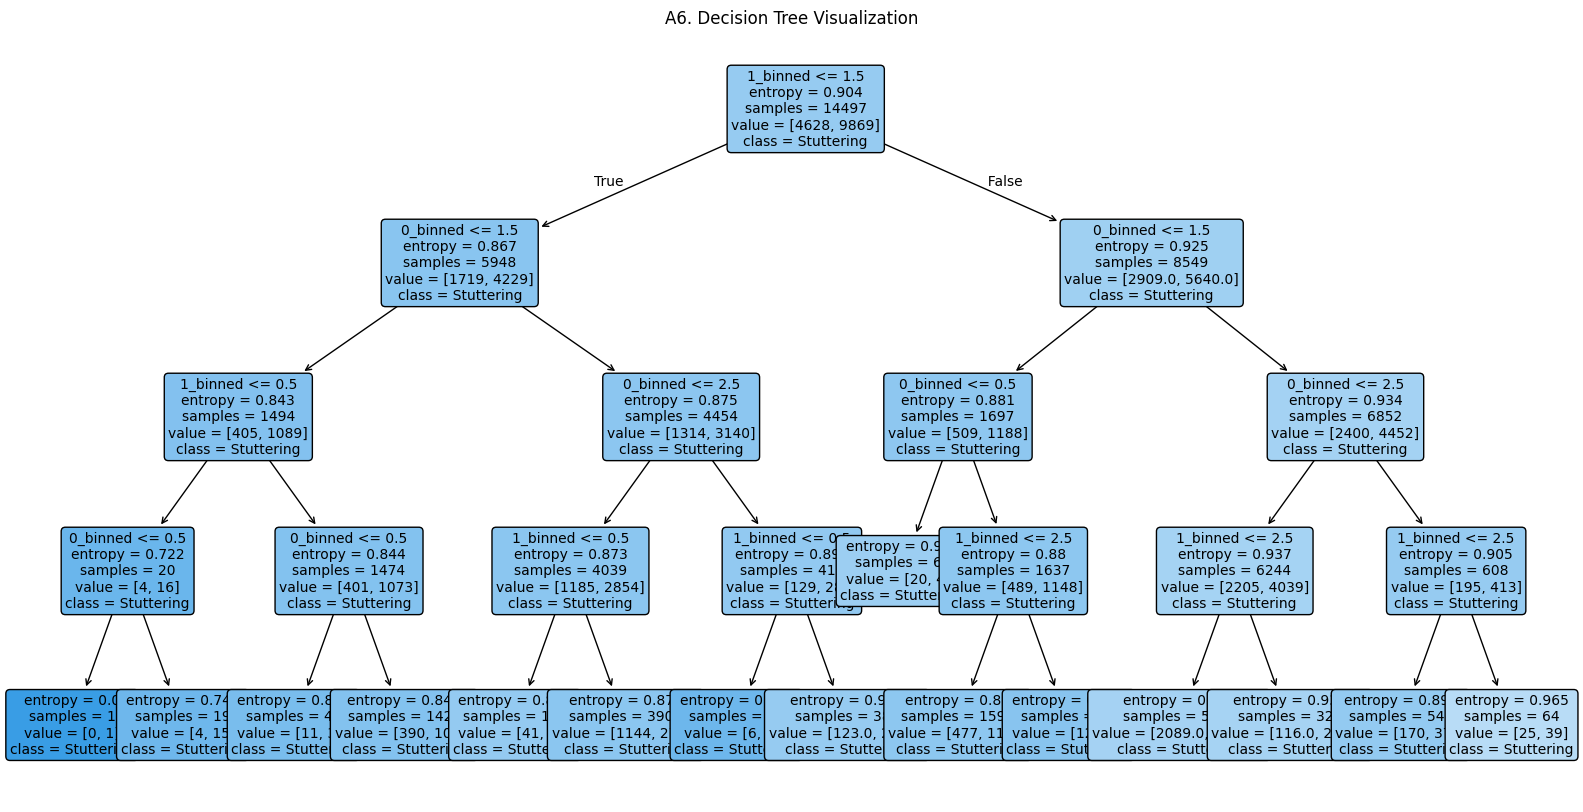

A6. Decision Tree
——————————————————————————————————————————————————


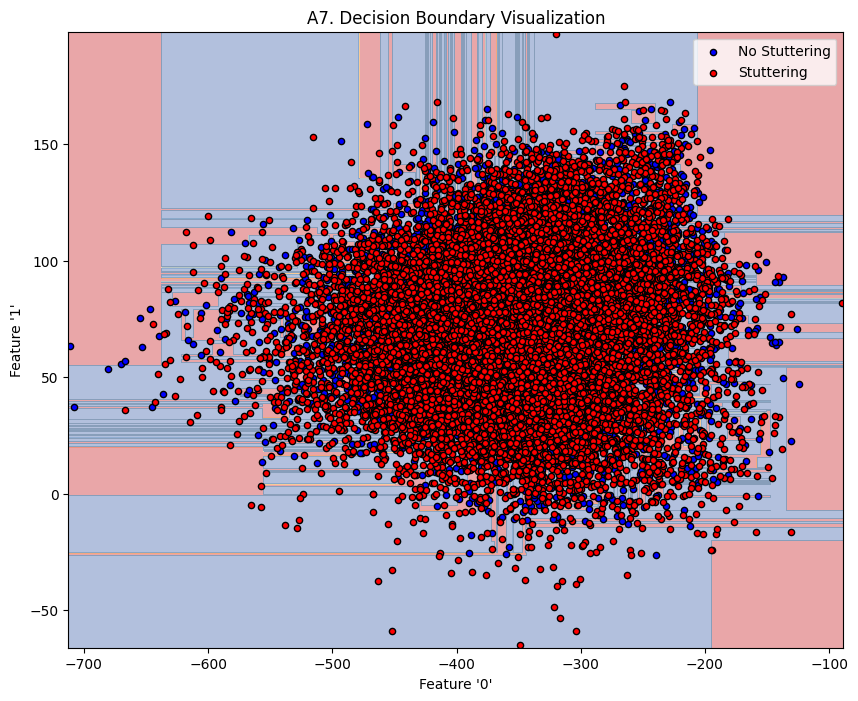

A7. The decision boundary for the two selected features


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ml-stuttering-events-dataset/cleaned-sep28k.csv')

# Drop the first unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# The 'Stuttering' column is the target variable for binary classification
X = df.drop('Stuttering', axis=1)
y = df['Stuttering']

# Convert continuous features to categorical using binning as required by A1 notes for continuous data
# Although 'Stuttering' is binary, we will apply binning to the continuous features.
# The number of bins is set as a parameter.
def equal_width_binning(data, n_bins=4):
    """
    Performs equal width binning on a continuous feature.
    Args:
        data (pd.Series): The continuous data to be binned.
        n_bins (int): The number of bins to create.
    Returns:
        pd.Series: The binned categorical data.
    """
    min_val = data.min()
    max_val = data.max()
    bins = np.linspace(min_val, max_val, n_bins + 1)
    binned_data = pd.cut(data, bins=bins, labels=False, include_lowest=True)
    return binned_data

# Use a specific feature, for example, '1', which appears to be a continuous feature
X['1_binned'] = equal_width_binning(X['1'])

# The assignment asks for a function for entropy, so we create one.
# It's important to note that this is typically done by the Decision Tree algorithm internally.
def calculate_entropy(target_data):
    """
    A1. Calculates the entropy of a dataset's target variable.
    Args:
        target_data (pd.Series): The target variable
    Returns:
        float: The calculated entropy.
    """
    counts = target_data.value_counts(normalize=True)
    entropy = -np.sum(counts * np.log2(counts))
    return entropy

# A2. Calculate the Gini Index
def calculate_gini(target_data):
    """
    A2. Calculates the Gini index of a dataset's target variable.
    Args:
        target_data (pd.Series): The target variable
    Returns:
        float: The calculated Gini index.
    """
    counts = target_data.value_counts(normalize=True)
    gini = 1 - np.sum(counts**2)
    return gini

# Calculate and print the values for the entire dataset
print(f"A1. Entropy of the 'Stuttering' dataset: {calculate_entropy(y)}")
print(f"A2. Gini Index of the 'Stuttering' dataset: {calculate_gini(y)}")
print("—" * 50)

# A3. Function for detecting the root node using information gain
def calculate_information_gain(data, feature, target):
    """
    A3. Calculates the information gain for a given feature.
    Args:
        data (pd.DataFrame): The dataset.
        feature (str): The feature column name.
        target (str): The target column name.
    Returns:
        float: The calculated information gain.
    """
    # Calculate the entropy of the entire dataset
    total_entropy = calculate_entropy(data[target])

    # Calculate the weighted entropy of the feature
    weighted_entropy = 0
    for category in data[feature].unique():
        subset = data[data[feature] == category]
        weighted_entropy += (len(subset) / len(data)) * calculate_entropy(subset[target])

    information_gain = total_entropy - weighted_entropy
    return information_gain

# A4. We will use the equal_width_binning function from A1
# Since the dataset has multiple continuous features, we'll convert a few for demonstration.
# Let's consider features '0' and '1' from the CSV
df['0_binned'] = equal_width_binning(df['0'], n_bins=4)
df['1_binned'] = equal_width_binning(df['1'], n_bins=4)

# Determine the best root node
information_gain_0 = calculate_information_gain(df, '0_binned', 'Stuttering')
information_gain_1 = calculate_information_gain(df, '1_binned', 'Stuttering')

print(f"A4,A3. Information Gain for feature '0_binned': {information_gain_0}")
print(f"A4,A3. Information Gain for feature '1_binned': {information_gain_1}")
print("—" * 50)

# A5. Build a Decision Tree module using scikit-learn
# This is a module that contains a decision tree classifier, which uses information gain (or entropy) as the impurity measure.
# First, we need to select the features to use for the decision tree.
# The assignment asks to detect the root node, so we use the categorical binned features.
features_to_use = ['0_binned', '1_binned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features_to_use], y, test_size=0.3, random_state=42)

# Create and train the Decision Tree classifier with entropy as the criterion (information gain)
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"A5. Decision Tree Classifier Accuracy: {accuracy}")
print(f"A5. Confusion Matrix:\n{conf_matrix}")
print("—" * 50)

# A6. Draw and visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=features_to_use, class_names=['No Stuttering', 'Stuttering'], filled=True, rounded=True, fontsize=10)
plt.title("A6. Decision Tree Visualization")
plt.show()

print("A6. Decision Tree")
print("—" * 50)

# A7. Visualize the decision boundary
# Using features '0' and '1' for visualization. We'll use the original continuous values for this visualization, but the DT was trained on the binned values.
# The assignment asks to use 2 features for classification, so this is a valid approach.
# We will create a new classifier using only these two features and their binned versions.
X_viz = df[['0', '1']].values
y_viz = df['Stuttering'].values

# Split the data into training and testing sets
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(X_viz, y_viz, test_size=0.3, random_state=42)

# Create a new decision tree classifier for visualization
dt_classifier_viz = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier_viz.fit(X_train_viz, y_train_viz)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = dt_classifier_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Create scatter plots for each class to generate legend handles
scatter_no_stuttering = plt.scatter(X_viz[y_viz == 0, 0], X_viz[y_viz == 0, 1], c='blue', s=20, edgecolor='k', label='No Stuttering')
scatter_stuttering = plt.scatter(X_viz[y_viz == 1, 0], X_viz[y_viz == 1, 1], c='red', s=20, edgecolor='k', label='Stuttering')

# Add the legend
plt.legend(handles=[scatter_no_stuttering, scatter_stuttering], loc='best')

plt.title("A7. Decision Boundary Visualization")
plt.xlabel("Feature '0'")
plt.ylabel("Feature '1'")
plt.show()

print("A7. The decision boundary for the two selected features")